# Titanic survival prediction 

This notebook goes through a basic exploratory data analysis of the Kaggle dataset with Python

## 1) Importing relevant depedencies 

In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [ ]:
conda install -c conda-forge catboost

In [2]:
#Importing train and test data

train = pd.read_csv("train.csv")
test = pd.read_csv("ttest.csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [4]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
len(train)

891

In [8]:
len(test)

418

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking out missing values

<AxesSubplot:>

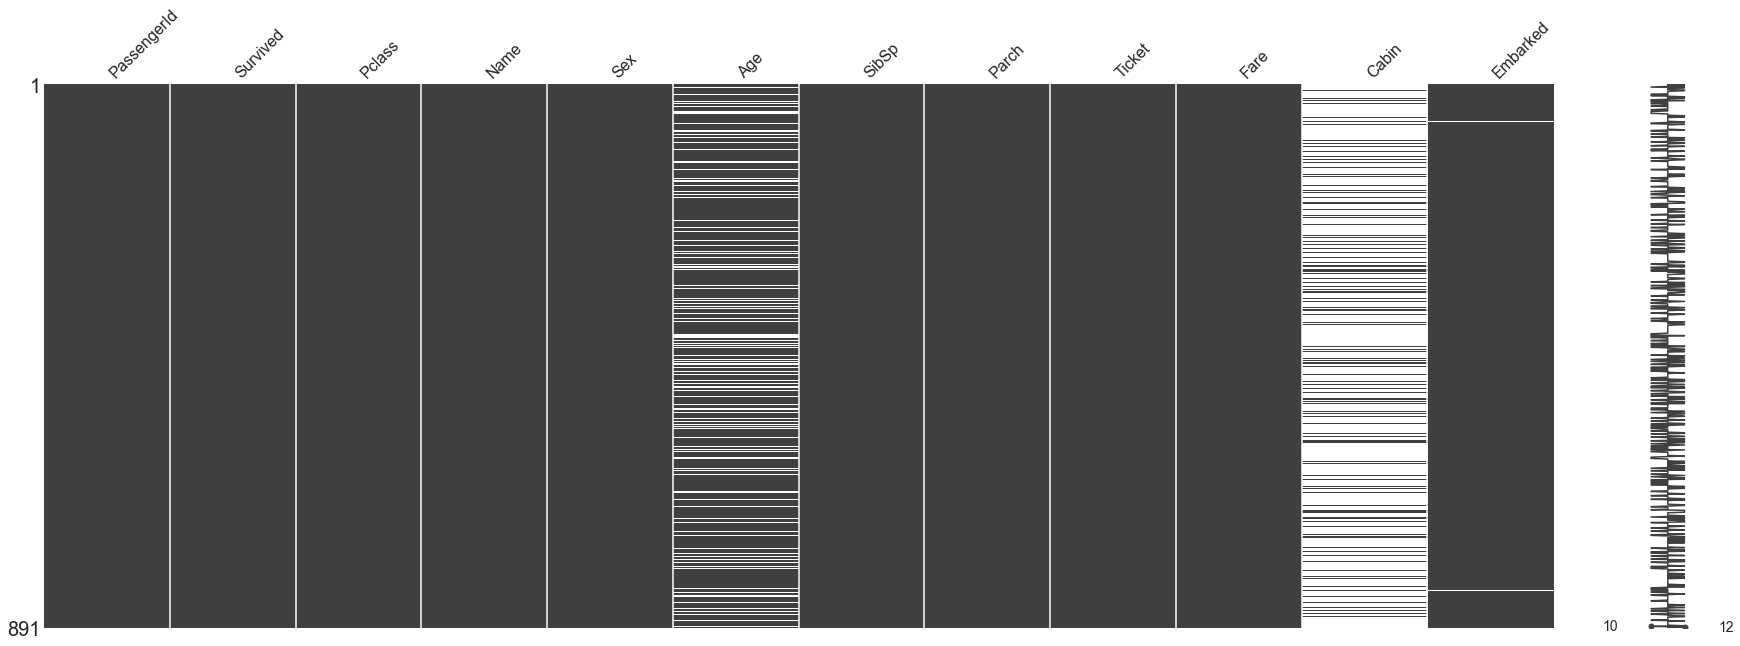

In [13]:
missingno.matrix(train, figsize=(30,10))

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Creating two new dataframes for data analysis

We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.

In [3]:
df_bin = pd.DataFrame() # for discretised continuous variables 0-10, 10-20
df_con = pd.DataFrame() # for continuous variables 

In [19]:
# Different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Exploring each feature individually  

## Target feature : Survived

Key: 0: Not survied , 1: Survived

This is the feature we want to predict based off all the others.

0    549
1    342
Name: Survived, dtype: int64


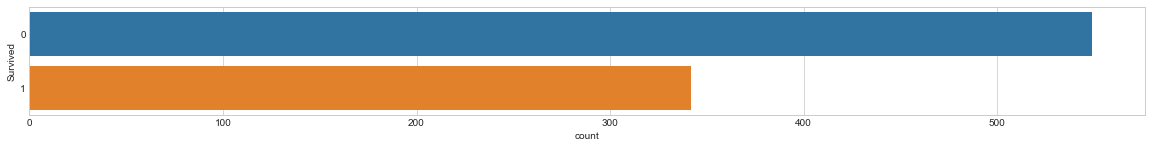

In [4]:
#How many survived 

fig,ax = plt.subplots(figsize=(20,2))
sns.countplot(y= "Survived", data = train)
print(train.Survived.value_counts())

In [4]:
#Adding this to our sub dataframes

df_bin["Survived"] = train["Survived"]
df_con["Survived"] = train["Survived"]

In [6]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [7]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## Feature: Pclass

Description : Ticket class of a passenger

Key: 1=1st , 2= 2nd , 3= 3rd 

* ordinal variable 



<AxesSubplot:xlabel='Pclass', ylabel='Density'>

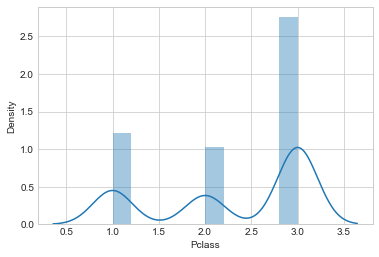

In [6]:
sns.distplot(train.Pclass) #Exploring the spread of values

We can see that the data in this feature is numerical yet they are categories

In [5]:
df_bin["Pclass"] = train["Pclass"] #Adding Pclass directly to sub dataframes as there are no missing values
df_con["Pclass"] = train["Pclass"] 

In [18]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


## Feature : Name

Description : The name of the passenger 

In [8]:
#To check different names 

train.Name.value_counts()[:50]

Downton, Mr. William James                         1
Rommetvedt, Mr. Knud Paust                         1
Collyer, Miss. Marjorie "Lottie"                   1
Roebling, Mr. Washington Augustus II               1
Patchett, Mr. George                               1
Asplund, Miss. Lillian Gertrud                     1
Rothschild, Mrs. Martin (Elizabeth L. Barrett)     1
Abbott, Mr. Rossmore Edward                        1
Landergren, Miss. Aurora Adelia                    1
Harris, Mr. George                                 1
Flynn, Mr. John Irwin ("Irving")                   1
West, Mr. Edwy Arthur                              1
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    1
Andersson, Miss. Erna Alexandra                    1
Silven, Miss. Lyyli Karoliina                      1
Smart, Mr. John Montgomery                         1
Slayter, Miss. Hilda Mary                          1
Thorne, Mrs. Gertrude Maybelle                     1
Lehmann, Miss. Bertha                         

In [12]:
len(train)

891

## Feature: Sex

Description : The sex of the passenger


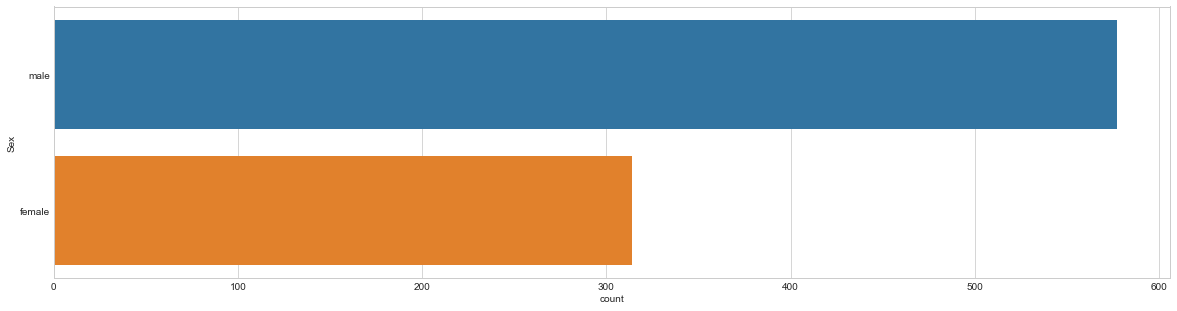

In [7]:
#Distribution of sex

ax,fig = plt.subplots(figsize=(20,5))
sns.countplot(y="Sex", data = train);


Since this data is already binary , we can add it to our sub dataframes.

In [6]:
df_bin["Sex"] = train["Sex"]

df_bin["Sex"] = np.where(df_bin["Sex"]=="female", 1,0)

df_con["Sex"] = train["Sex"]



In [52]:
df_bin.head()

,Pclass,Sex,Survived
0,3,0,0
1,1,1,1
2,3,1,1
3,1,1,1
4,3,0,0


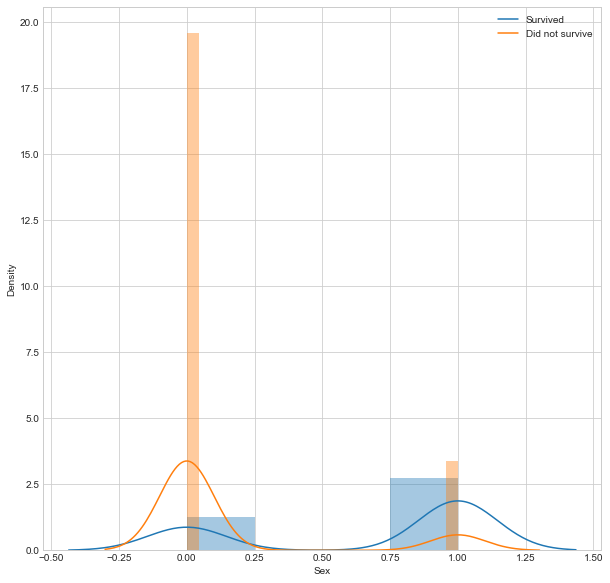

In [7]:
#How does the Sex variable look compared to Survival

fig,ax  = plt.subplots(figsize=(10,10))

sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'}); #blue- survived, yellow = not survive
plt.legend()

More number of females survived than number of men.

In [51]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Feature : Age

Description: Age of passenger

Out of 891 , 177 values are missing 

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_imputer = SimpleImputer(strategy = "median")

num_feature = ["Age"]

imputer= ColumnTransformer([("num_imputer", num_imputer, num_feature)])

#Transform the data 
filled_age = imputer.fit_transform(train)

filled_age



array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [28.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [28.  ],
       [31.  ],
       [28.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [28.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [40.  ],
       [28.  ],
       [28.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [28.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [28.  ],
       [ 3.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [28.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [9]:
Age_test = imputer.fit_transform(test)

In [10]:
train["AGE"] = filled_age
test["Age_test"] = Age_test

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AGE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_test
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


In [12]:
train = train.drop("Age", axis =1) # Dropping previous age columns which had missing values

In [13]:
test = test.drop("Age", axis =1)

In [21]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AGE              0
dtype: int64

In [14]:
df_con["Age"] = pd.cut(train["AGE"],10) # bucketed into different values
df_bin["Age"] = train["AGE"] #non bucketed values

In [23]:
df_con.head()


,Survived,Pclass,Sex,Age
0,0,3,male,"(16.336, 24.294]"
1,1,1,female,"(32.252, 40.21]"
2,1,3,female,"(24.294, 32.252]"
3,1,1,female,"(32.252, 40.21]"
4,0,3,male,"(32.252, 40.21]"


In [28]:
df_bin.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,22.0,1,0,"(-0.512, 102.466]",S
1,1,1,38.0,1,0,"(-0.512, 102.466]",C
2,1,1,26.0,0,0,"(-0.512, 102.466]",S
3,1,1,35.0,1,0,"(-0.512, 102.466]",S
4,0,0,35.0,0,0,"(-0.512, 102.466]",S


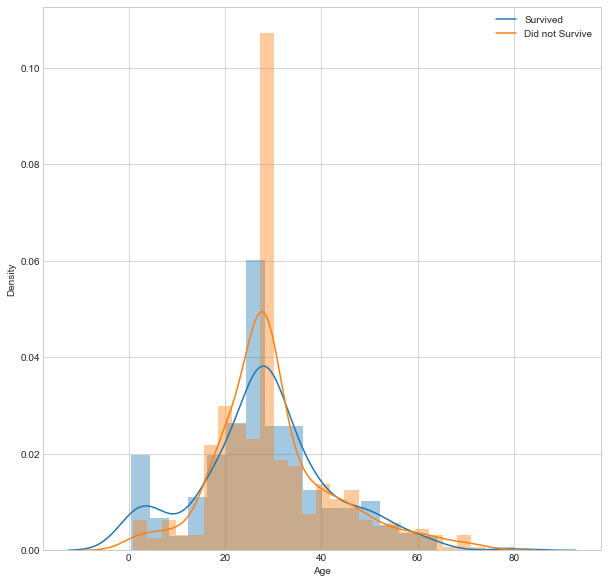

In [15]:
fig,ax  = plt.subplots(figsize=(10,10))

sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Age'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Age'], kde_kws={'label': 'Did not Survive'});

plt.legend()

# Function to create count and distribution plots

In [16]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
        plt.legend()
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
        plt.legend()

## Feature : SibSp

Description : No. of spouses/siblings the passenger has aboard the titanic



In [18]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [17]:
#Add SibSp to our subset Dataframes

df_bin["SibSp"] = train["SibSp"]
df_con["SibSp"] = train["SibSp"]

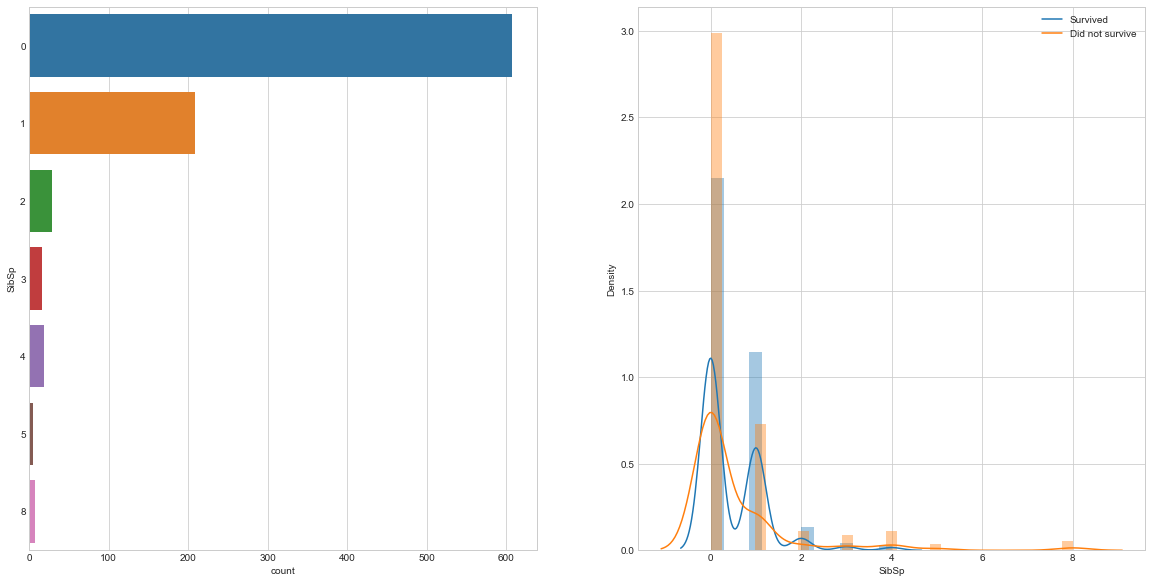

In [43]:
#Visualize the counts of SibSp and distribution of values against Survived

plot_count_dist(train,bin_df= df_bin, label_column="Survived", target_column = "SibSp", figsize = (20,10))


## Feature Parch

Description : The number of parents/children the passenger has aboard the Titanic.
This feature is similar to SibSp



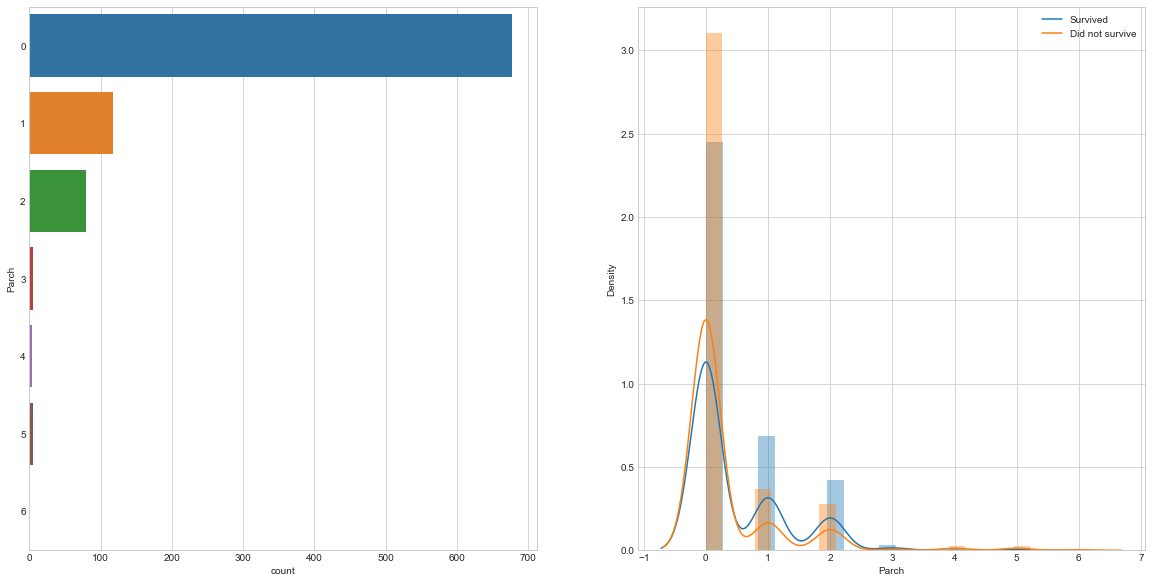

In [18]:
#Visualize the counts of Parch and distribution of the values
#Against Survived

plot_count_dist(train,bin_df=df_bin,label_column="Survived", target_column = "Parch",figsize=(20,10))

In [46]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [19]:
#Adding Parch to our subset dataframes

df_bin["Parch"] = train["Parch"]

df_con["Parch"] = train["Parch"]

In [31]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Age
0,0,3,male,1,0,"(16.336, 24.294]"
1,1,1,female,1,0,"(32.252, 40.21]"
2,1,3,female,0,0,"(24.294, 32.252]"
3,1,1,female,1,0,"(32.252, 40.21]"
4,0,3,male,0,0,"(32.252, 40.21]"


In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AGE
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


## Feature: Ticket

Description : Ticket number of boarding passenger 



In [33]:
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
347088      6
CA 2144     6
           ..
341826      1
367231      1
6563        1
349216      1
324669      1
Name: Ticket, Length: 681, dtype: int64

In [40]:
len(train.Ticket.unique()) #681 unique values

681

## Feature: Fare 

Description : The cost of ticket

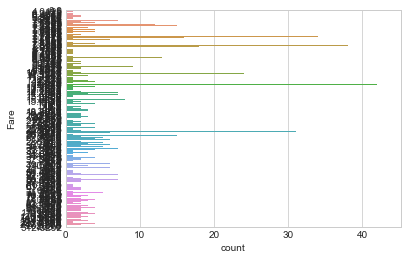

In [36]:
sns.countplot(y= "Fare", data = train);

In [38]:
len(train.Fare.unique()) #There are 248 unique values

248

In [20]:
df_con["Fare"] = train["Fare"] 

df_bin["Fare"] = pd.cut(train["Fare"], bins=5) #discretised

In [43]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Age,Fare
0,0,3,0,1,0,22.0,"(-0.512, 102.466]"
1,1,1,1,1,0,38.0,"(-0.512, 102.466]"
2,1,3,1,0,0,26.0,"(-0.512, 102.466]"
3,1,1,1,1,0,35.0,"(-0.512, 102.466]"
4,0,3,0,0,0,35.0,"(-0.512, 102.466]"


In [44]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Age,Fare
0,0,3,male,1,0,"(16.336, 24.294]",7.2500
1,1,1,female,1,0,"(32.252, 40.21]",71.2833
2,1,3,female,0,0,"(24.294, 32.252]",7.9250
3,1,1,female,1,0,"(32.252, 40.21]",53.1000
4,0,3,male,0,0,"(32.252, 40.21]",8.0500


In [45]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

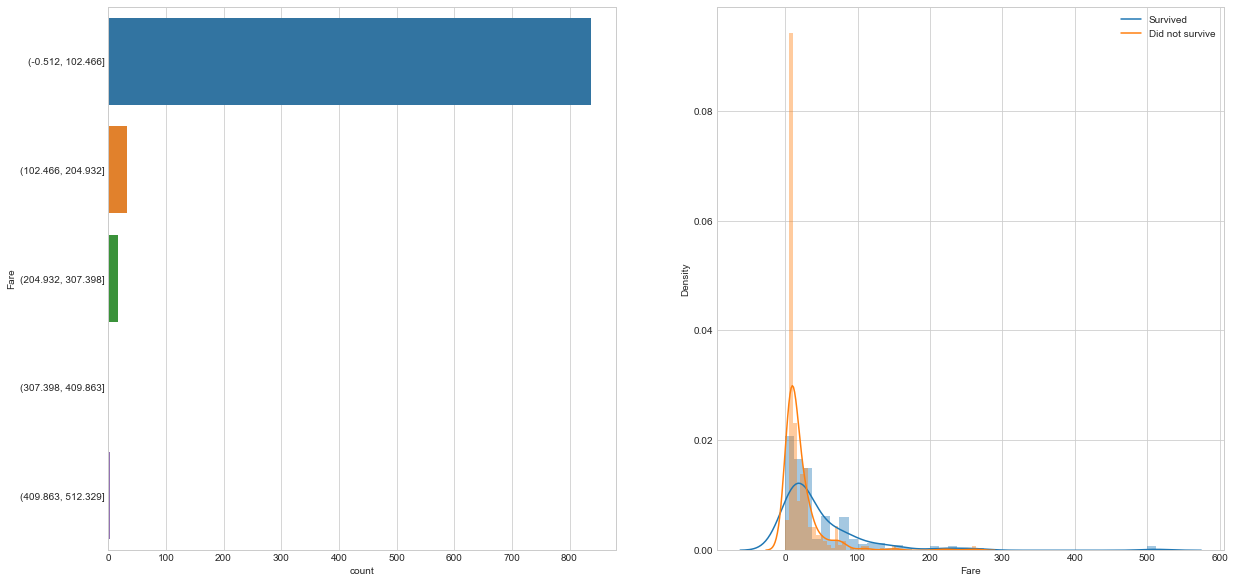

In [21]:
plot_count_dist(data= train, bin_df = df_bin,label_column = "Survived", target_column = "Fare", figsize =(20,10),use_bin_df= True )

## Feature : Cabin

Description : The cabin number where the passenger was staying 

In [48]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AGE              0
dtype: int64

We will not be using Cabin feature as it has so many missing values

## Feature : Embarked

Description: The port where the passenger boarded the Titanic 

C: Cherbourg Q = Queenstown S = Southampton 

In [50]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AGE              0
dtype: int64

In [51]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Embarked'>

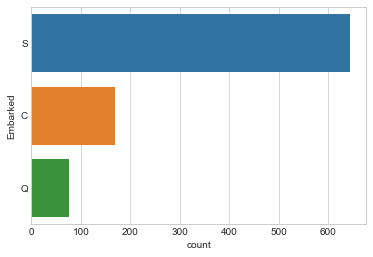

In [52]:
sns.countplot(y= "Embarked", data =train)

In [21]:
#Adding Embarked feature to sub dataframes

df_bin["Embarked"] = train["Embarked"]  
df_con["Embarked"] = train["Embarked"]

In [23]:
#Removing rows from Embarked feature having missing values
print(len(df_con))
df_con = df_con.dropna(subset=["Embarked"])
df_bin= df_bin.dropna(subset=["Embarked"])
print(len(df_con))

891
889


In [55]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Age,Fare,Embarked
0,0,3,0,1,0,22.0,"(-0.512, 102.466]",S
1,1,1,1,1,0,38.0,"(-0.512, 102.466]",C
2,1,3,1,0,0,26.0,"(-0.512, 102.466]",S
3,1,1,1,1,0,35.0,"(-0.512, 102.466]",S
4,0,3,0,0,0,35.0,"(-0.512, 102.466]",S


In [56]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Age,Fare,Embarked
0,0,3,male,1,0,"(16.336, 24.294]",7.2500,S
1,1,1,female,1,0,"(32.252, 40.21]",71.2833,C
2,1,3,female,0,0,"(24.294, 32.252]",7.9250,S
3,1,1,female,1,0,"(32.252, 40.21]",53.1000,S
4,0,3,male,0,0,"(32.252, 40.21]",8.0500,S


In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AGE
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


# Feature Encoding

Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.



In [22]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_0.42,Age_0.67,Age_0.75,Age_0.83,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [24]:

# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [25]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [28]:
# Let's look at df_con_enc
df_con_enc.head(20)

,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,"(16.336, 24.294]",1,0,7.2500,0,0,1,0,1,0,0,1
1,1,"(32.252, 40.21]",1,0,71.2833,1,0,0,1,0,1,0,0
2,1,"(24.294, 32.252]",0,0,7.9250,0,0,1,1,0,0,0,1
3,1,"(32.252, 40.21]",1,0,53.1000,0,0,1,1,0,1,0,0
4,0,"(32.252, 40.21]",0,0,8.0500,0,0,1,0,1,0,0,1
5,0,"(24.294, 32.252]",0,0,8.4583,0,1,0,0,1,0,0,1
6,0,"(48.168, 56.126]",0,0,51.8625,0,0,1,0,1,1,0,0
7,0,"(0.34, 8.378]",3,1,21.0750,0,0,1,0,1,0,0,1
8,1,"(24.294, 32.252]",0,2,11.1333,0,0,1,1,0,0,0,1
9,1,"(8.378, 16.336]",1,0,30.0708,1,0,0,1,0,0,1,0


## Building ML models

### Separating the data

In [26]:
#Select the dataframe we want to use

selected_df = df_con_enc

In [33]:
df_con_enc = df_con_enc.drop("Age", axis = 1)

In [34]:
df_con_enc["Age"] = train["AGE"]

In [48]:
selected_df.drop("Age", axis =1)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,13.0000,0,0,1,0,1,0,1,0
887,1,0,0,30.0000,0,0,1,1,0,1,0,0
888,0,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,0,0,30.0000,1,0,0,0,1,1,0,0


In [49]:
selected_df["Age"] =  df_con_enc["Age"]

In [50]:
X_train = selected_df.drop("Survived" , axis =1)

y_train = selected_df["Survived"]

In [51]:
X_train.shape

(891, 12)

In [52]:
y_train.shape

(891,)

In [53]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train,y_train) *100,2)
    
    train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv=cv, n_jobs = -1)
    
    acc_cv = round(metrics.accuracy_score(y_train, train_pred)*100,2)
    
    return train_pred, acc ,acc_cv

In [54]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 80.58
Accuracy CV 10-Fold: 79.91
Running Time: 0:00:02.183254


In [55]:

# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 82.15
Accuracy CV 10-Fold: 71.72
Running Time: 0:00:00.115199


In [56]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.68
Accuracy CV 10-Fold: 78.45
Running Time: 0:00:00.101728


In [57]:

# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 71.94
Accuracy CV 10-Fold: 73.96
Running Time: 0:00:00.206448


In [58]:

# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 71.83
Accuracy CV 10-Fold: 69.47
Running Time: 0:00:00.064827


In [59]:

# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 97.98
Accuracy CV 10-Fold: 78.79
Running Time: 0:00:00.059361


In [60]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 89.11
Accuracy CV 10-Fold: 82.83
Running Time: 0:00:00.400720


## Catboost Algorithm

In [61]:
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [62]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [66]:
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22,1,0,7.2500,0,0,1,0,1,0,0,1
1,38,1,0,71.2833,1,0,0,1,0,1,0,0
2,26,0,0,7.9250,0,0,1,1,0,0,0,1
3,35,1,0,53.1000,0,0,1,1,0,1,0,0
4,35,0,0,8.0500,0,0,1,0,1,0,0,1


In [65]:
X_train["Age"] = X_train["Age"].astype(int)

In [67]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [68]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [69]:
#Catboost model definition 

catboost_model = CatBoostClassifier(iterations = 1000, custom_loss= ["Accuracy"], loss_function = "Logloss")

#Fit Catboost model 

catboost_model.fit(train_pool,plot = True)

#Catboost accuracy

acc_catboost = round(catboost_model.score(X_train,y_train)*100,2)

Learning rate set to 0.009807


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6861015	total: 215ms	remaining: 3m 34s
1:	learn: 0.6801486	total: 232ms	remaining: 1m 55s
2:	learn: 0.6740061	total: 247ms	remaining: 1m 22s
3:	learn: 0.6689249	total: 276ms	remaining: 1m 8s
4:	learn: 0.6640986	total: 300ms	remaining: 59.7s
5:	learn: 0.6576122	total: 314ms	remaining: 51.9s
6:	learn: 0.6543952	total: 322ms	remaining: 45.6s
7:	learn: 0.6483514	total: 332ms	remaining: 41.1s
8:	learn: 0.6452838	total: 336ms	remaining: 37s
9:	learn: 0.6403766	total: 370ms	remaining: 36.6s
10:	learn: 0.6348497	total: 401ms	remaining: 36s
11:	learn: 0.6295155	total: 430ms	remaining: 35.4s
12:	learn: 0.6244452	total: 441ms	remaining: 33.5s
13:	learn: 0.6201690	total: 461ms	remaining: 32.5s
14:	learn: 0.6162789	total: 477ms	remaining: 31.3s
15:	learn: 0.6123836	total: 496ms	remaining: 30.5s
16:	learn: 0.6092424	total: 511ms	remaining: 29.6s
17:	learn: 0.6053830	total: 523ms	remaining: 28.5s
18:	learn: 0.6013915	total: 531ms	remaining: 27.4s
19:	learn: 0.5986141	total: 537ms	remainin

164:	learn: 0.4225656	total: 2.8s	remaining: 14.2s
165:	learn: 0.4223366	total: 2.82s	remaining: 14.2s
166:	learn: 0.4221708	total: 2.83s	remaining: 14.1s
167:	learn: 0.4218908	total: 2.85s	remaining: 14.1s
168:	learn: 0.4217139	total: 2.86s	remaining: 14s
169:	learn: 0.4214136	total: 2.87s	remaining: 14s
170:	learn: 0.4210251	total: 2.88s	remaining: 14s
171:	learn: 0.4206405	total: 2.9s	remaining: 14s
172:	learn: 0.4203775	total: 2.94s	remaining: 14s
173:	learn: 0.4199636	total: 2.95s	remaining: 14s
174:	learn: 0.4197528	total: 2.96s	remaining: 13.9s
175:	learn: 0.4195039	total: 2.97s	remaining: 13.9s
176:	learn: 0.4190271	total: 2.98s	remaining: 13.9s
177:	learn: 0.4186981	total: 3s	remaining: 13.8s
178:	learn: 0.4183393	total: 3.01s	remaining: 13.8s
179:	learn: 0.4181738	total: 3.02s	remaining: 13.8s
180:	learn: 0.4177500	total: 3.03s	remaining: 13.7s
181:	learn: 0.4173207	total: 3.05s	remaining: 13.7s
182:	learn: 0.4169698	total: 3.08s	remaining: 13.7s
183:	learn: 0.4163082	total: 

324:	learn: 0.3875919	total: 5.62s	remaining: 11.7s
325:	learn: 0.3875027	total: 5.63s	remaining: 11.6s
326:	learn: 0.3874720	total: 5.64s	remaining: 11.6s
327:	learn: 0.3873886	total: 5.65s	remaining: 11.6s
328:	learn: 0.3873217	total: 5.66s	remaining: 11.5s
329:	learn: 0.3871426	total: 5.68s	remaining: 11.5s
330:	learn: 0.3871044	total: 5.71s	remaining: 11.5s
331:	learn: 0.3870532	total: 5.72s	remaining: 11.5s
332:	learn: 0.3868477	total: 5.73s	remaining: 11.5s
333:	learn: 0.3866619	total: 5.74s	remaining: 11.4s
334:	learn: 0.3866047	total: 5.75s	remaining: 11.4s
335:	learn: 0.3864544	total: 5.76s	remaining: 11.4s
336:	learn: 0.3861594	total: 5.77s	remaining: 11.4s
337:	learn: 0.3860268	total: 5.78s	remaining: 11.3s
338:	learn: 0.3858753	total: 5.8s	remaining: 11.3s
339:	learn: 0.3856128	total: 5.82s	remaining: 11.3s
340:	learn: 0.3855911	total: 5.83s	remaining: 11.3s
341:	learn: 0.3854865	total: 5.84s	remaining: 11.2s
342:	learn: 0.3854812	total: 5.84s	remaining: 11.2s
343:	learn: 0

492:	learn: 0.3643550	total: 8.26s	remaining: 8.49s
493:	learn: 0.3642929	total: 8.27s	remaining: 8.47s
494:	learn: 0.3642921	total: 8.27s	remaining: 8.44s
495:	learn: 0.3642112	total: 8.28s	remaining: 8.42s
496:	learn: 0.3641858	total: 8.3s	remaining: 8.4s
497:	learn: 0.3641299	total: 8.31s	remaining: 8.37s
498:	learn: 0.3636519	total: 8.32s	remaining: 8.35s
499:	learn: 0.3635919	total: 8.33s	remaining: 8.33s
500:	learn: 0.3635766	total: 8.33s	remaining: 8.3s
501:	learn: 0.3634766	total: 8.36s	remaining: 8.29s
502:	learn: 0.3632128	total: 8.37s	remaining: 8.27s
503:	learn: 0.3628564	total: 8.38s	remaining: 8.25s
504:	learn: 0.3625688	total: 8.39s	remaining: 8.22s
505:	learn: 0.3623240	total: 8.41s	remaining: 8.22s
506:	learn: 0.3622591	total: 8.43s	remaining: 8.2s
507:	learn: 0.3622591	total: 8.44s	remaining: 8.18s
508:	learn: 0.3621521	total: 8.45s	remaining: 8.15s
509:	learn: 0.3620691	total: 8.48s	remaining: 8.14s
510:	learn: 0.3620421	total: 8.49s	remaining: 8.13s
511:	learn: 0.36

657:	learn: 0.3443784	total: 10.9s	remaining: 5.65s
658:	learn: 0.3443152	total: 10.9s	remaining: 5.63s
659:	learn: 0.3442178	total: 10.9s	remaining: 5.61s
660:	learn: 0.3440564	total: 10.9s	remaining: 5.6s
661:	learn: 0.3440563	total: 10.9s	remaining: 5.58s
662:	learn: 0.3440009	total: 10.9s	remaining: 5.56s
663:	learn: 0.3439090	total: 10.9s	remaining: 5.54s
664:	learn: 0.3437973	total: 11s	remaining: 5.53s
665:	learn: 0.3434971	total: 11s	remaining: 5.51s
666:	learn: 0.3433718	total: 11s	remaining: 5.49s
667:	learn: 0.3433257	total: 11s	remaining: 5.47s
668:	learn: 0.3432652	total: 11s	remaining: 5.45s
669:	learn: 0.3431575	total: 11s	remaining: 5.43s
670:	learn: 0.3430591	total: 11s	remaining: 5.41s
671:	learn: 0.3429274	total: 11.1s	remaining: 5.4s
672:	learn: 0.3426864	total: 11.1s	remaining: 5.38s
673:	learn: 0.3425309	total: 11.1s	remaining: 5.36s
674:	learn: 0.3424729	total: 11.1s	remaining: 5.34s
675:	learn: 0.3422702	total: 11.1s	remaining: 5.34s
676:	learn: 0.3420455	total:

820:	learn: 0.3263255	total: 13.3s	remaining: 2.9s
821:	learn: 0.3262966	total: 13.3s	remaining: 2.88s
822:	learn: 0.3262005	total: 13.3s	remaining: 2.86s
823:	learn: 0.3261610	total: 13.3s	remaining: 2.85s
824:	learn: 0.3261384	total: 13.3s	remaining: 2.83s
825:	learn: 0.3260367	total: 13.3s	remaining: 2.81s
826:	learn: 0.3259977	total: 13.3s	remaining: 2.79s
827:	learn: 0.3258081	total: 13.4s	remaining: 2.77s
828:	learn: 0.3257036	total: 13.4s	remaining: 2.76s
829:	learn: 0.3256920	total: 13.4s	remaining: 2.74s
830:	learn: 0.3255486	total: 13.4s	remaining: 2.73s
831:	learn: 0.3254361	total: 13.4s	remaining: 2.71s
832:	learn: 0.3254065	total: 13.4s	remaining: 2.69s
833:	learn: 0.3253711	total: 13.4s	remaining: 2.68s
834:	learn: 0.3252941	total: 13.5s	remaining: 2.66s
835:	learn: 0.3251238	total: 13.5s	remaining: 2.64s
836:	learn: 0.3248756	total: 13.5s	remaining: 2.62s
837:	learn: 0.3248376	total: 13.5s	remaining: 2.61s
838:	learn: 0.3246116	total: 13.5s	remaining: 2.59s
839:	learn: 0

984:	learn: 0.3104957	total: 15.9s	remaining: 243ms
985:	learn: 0.3104301	total: 16s	remaining: 227ms
986:	learn: 0.3103767	total: 16s	remaining: 210ms
987:	learn: 0.3103327	total: 16s	remaining: 194ms
988:	learn: 0.3103283	total: 16s	remaining: 178ms
989:	learn: 0.3101699	total: 16s	remaining: 162ms
990:	learn: 0.3100876	total: 16s	remaining: 146ms
991:	learn: 0.3100276	total: 16.1s	remaining: 130ms
992:	learn: 0.3100241	total: 16.1s	remaining: 113ms
993:	learn: 0.3099232	total: 16.1s	remaining: 97.2ms
994:	learn: 0.3098890	total: 16.1s	remaining: 81ms
995:	learn: 0.3097850	total: 16.1s	remaining: 64.8ms
996:	learn: 0.3096573	total: 16.2s	remaining: 48.6ms
997:	learn: 0.3096209	total: 16.2s	remaining: 32.4ms
998:	learn: 0.3095722	total: 16.2s	remaining: 16.2ms
999:	learn: 0.3094439	total: 16.2s	remaining: 0us


In [70]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6777463	test: 0.6779256	best: 0.6779256 (0)	total: 298ms	remaining: 4m 57s
1:	learn: 0.6629262	test: 0.6635355	best: 0.6635355 (1)	total: 550ms	remaining: 4m 34s
2:	learn: 0.6491963	test: 0.6504076	best: 0.6504076 (2)	total: 804ms	remaining: 4m 27s
3:	learn: 0.6368722	test: 0.6389225	best: 0.6389225 (3)	total: 1.1s	remaining: 4m 35s
4:	learn: 0.6228559	test: 0.6256915	best: 0.6256915 (4)	total: 1.41s	remaining: 4m 40s
5:	learn: 0.6118200	test: 0.6156576	best: 0.6156576 (5)	total: 1.72s	remaining: 4m 44s
6:	learn: 0.5993668	test: 0.6036620	best: 0.6036620 (6)	total: 1.98s	remaining: 4m 40s
7:	learn: 0.5878879	test: 0.5926598	best: 0.5926598 (7)	total: 2.26s	remaining: 4m 40s
8:	learn: 0.5768213	test: 0.5820692	best: 0.5820692 (8)	total: 2.56s	remaining: 4m 42s
9:	learn: 0.5676073	test: 0.5737223	best: 0.5737223 (9)	total: 2.94s	remaining: 4m 50s
10:	learn: 0.5593907	test: 0.5658845	best: 0.5658845 (10)	total: 3.24s	remaining: 4m 51s
11:	learn: 0.5522450	test: 0.5592370	best:

93:	learn: 0.3889962	test: 0.4426914	best: 0.4426914 (93)	total: 26.9s	remaining: 4m 19s
94:	learn: 0.3885236	test: 0.4425686	best: 0.4425686 (94)	total: 27.2s	remaining: 4m 19s
95:	learn: 0.3881544	test: 0.4423345	best: 0.4423345 (95)	total: 27.5s	remaining: 4m 18s
96:	learn: 0.3876111	test: 0.4419011	best: 0.4419011 (96)	total: 27.8s	remaining: 4m 18s
97:	learn: 0.3872903	test: 0.4418455	best: 0.4418455 (97)	total: 28.1s	remaining: 4m 18s
98:	learn: 0.3864619	test: 0.4414676	best: 0.4414676 (98)	total: 28.3s	remaining: 4m 17s
99:	learn: 0.3857876	test: 0.4413002	best: 0.4413002 (99)	total: 28.6s	remaining: 4m 17s
100:	learn: 0.3851107	test: 0.4410403	best: 0.4410403 (100)	total: 28.9s	remaining: 4m 17s
101:	learn: 0.3845330	test: 0.4411023	best: 0.4410403 (100)	total: 29.2s	remaining: 4m 17s
102:	learn: 0.3840448	test: 0.4409615	best: 0.4409615 (102)	total: 29.5s	remaining: 4m 16s
103:	learn: 0.3835729	test: 0.4407078	best: 0.4407078 (103)	total: 29.7s	remaining: 4m 16s
104:	learn: 0

185:	learn: 0.3457829	test: 0.4349864	best: 0.4349864 (185)	total: 54.7s	remaining: 3m 59s
186:	learn: 0.3453645	test: 0.4349785	best: 0.4349785 (186)	total: 55.1s	remaining: 3m 59s
187:	learn: 0.3447933	test: 0.4346486	best: 0.4346486 (187)	total: 55.4s	remaining: 3m 59s
188:	learn: 0.3444674	test: 0.4347965	best: 0.4346486 (187)	total: 55.7s	remaining: 3m 58s
189:	learn: 0.3440191	test: 0.4349823	best: 0.4346486 (187)	total: 56s	remaining: 3m 58s
190:	learn: 0.3435036	test: 0.4348721	best: 0.4346486 (187)	total: 56.3s	remaining: 3m 58s
191:	learn: 0.3431526	test: 0.4347202	best: 0.4346486 (187)	total: 56.6s	remaining: 3m 58s
192:	learn: 0.3428869	test: 0.4347249	best: 0.4346486 (187)	total: 57s	remaining: 3m 58s
193:	learn: 0.3426481	test: 0.4347279	best: 0.4346486 (187)	total: 57.4s	remaining: 3m 58s
194:	learn: 0.3422597	test: 0.4347061	best: 0.4346486 (187)	total: 57.7s	remaining: 3m 58s
195:	learn: 0.3418394	test: 0.4347181	best: 0.4346486 (187)	total: 58s	remaining: 3m 57s
196:	

275:	learn: 0.3133916	test: 0.4351428	best: 0.4338375 (209)	total: 1m 26s	remaining: 3m 47s
276:	learn: 0.3130262	test: 0.4349409	best: 0.4338375 (209)	total: 1m 26s	remaining: 3m 46s
277:	learn: 0.3125993	test: 0.4348129	best: 0.4338375 (209)	total: 1m 27s	remaining: 3m 46s
278:	learn: 0.3124113	test: 0.4349461	best: 0.4338375 (209)	total: 1m 27s	remaining: 3m 46s
279:	learn: 0.3120577	test: 0.4348321	best: 0.4338375 (209)	total: 1m 27s	remaining: 3m 46s
280:	learn: 0.3117671	test: 0.4348996	best: 0.4338375 (209)	total: 1m 28s	remaining: 3m 46s
281:	learn: 0.3114614	test: 0.4351039	best: 0.4338375 (209)	total: 1m 28s	remaining: 3m 45s
282:	learn: 0.3112022	test: 0.4350363	best: 0.4338375 (209)	total: 1m 28s	remaining: 3m 45s
283:	learn: 0.3108366	test: 0.4351654	best: 0.4338375 (209)	total: 1m 29s	remaining: 3m 45s
284:	learn: 0.3104247	test: 0.4352104	best: 0.4338375 (209)	total: 1m 29s	remaining: 3m 45s
285:	learn: 0.3100958	test: 0.4353931	best: 0.4338375 (209)	total: 1m 30s	remain

365:	learn: 0.2842707	test: 0.4397507	best: 0.4338375 (209)	total: 2m	remaining: 3m 27s
366:	learn: 0.2838885	test: 0.4397355	best: 0.4338375 (209)	total: 2m	remaining: 3m 27s
367:	learn: 0.2834949	test: 0.4397137	best: 0.4338375 (209)	total: 2m	remaining: 3m 27s
368:	learn: 0.2831845	test: 0.4398024	best: 0.4338375 (209)	total: 2m 1s	remaining: 3m 26s
369:	learn: 0.2828049	test: 0.4399435	best: 0.4338375 (209)	total: 2m 1s	remaining: 3m 26s
370:	learn: 0.2825444	test: 0.4397876	best: 0.4338375 (209)	total: 2m 1s	remaining: 3m 26s
371:	learn: 0.2821942	test: 0.4400404	best: 0.4338375 (209)	total: 2m 2s	remaining: 3m 26s
372:	learn: 0.2818883	test: 0.4399778	best: 0.4338375 (209)	total: 2m 2s	remaining: 3m 26s
373:	learn: 0.2816352	test: 0.4400402	best: 0.4338375 (209)	total: 2m 2s	remaining: 3m 25s
374:	learn: 0.2813142	test: 0.4401413	best: 0.4338375 (209)	total: 2m 3s	remaining: 3m 25s
375:	learn: 0.2810232	test: 0.4404398	best: 0.4338375 (209)	total: 2m 3s	remaining: 3m 25s
376:	lea

455:	learn: 0.2577699	test: 0.4427256	best: 0.4338375 (209)	total: 2m 31s	remaining: 3m
456:	learn: 0.2575037	test: 0.4427175	best: 0.4338375 (209)	total: 2m 31s	remaining: 3m
457:	learn: 0.2572839	test: 0.4427137	best: 0.4338375 (209)	total: 2m 32s	remaining: 3m
458:	learn: 0.2569140	test: 0.4429007	best: 0.4338375 (209)	total: 2m 32s	remaining: 2m 59s
459:	learn: 0.2565725	test: 0.4429239	best: 0.4338375 (209)	total: 2m 32s	remaining: 2m 59s
460:	learn: 0.2563383	test: 0.4430629	best: 0.4338375 (209)	total: 2m 33s	remaining: 2m 59s
461:	learn: 0.2560681	test: 0.4431040	best: 0.4338375 (209)	total: 2m 33s	remaining: 2m 58s
462:	learn: 0.2558265	test: 0.4432015	best: 0.4338375 (209)	total: 2m 33s	remaining: 2m 58s
463:	learn: 0.2555860	test: 0.4432105	best: 0.4338375 (209)	total: 2m 34s	remaining: 2m 58s
464:	learn: 0.2552528	test: 0.4431671	best: 0.4338375 (209)	total: 2m 34s	remaining: 2m 57s
465:	learn: 0.2549476	test: 0.4431744	best: 0.4338375 (209)	total: 2m 34s	remaining: 2m 57s


545:	learn: 0.2352743	test: 0.4469860	best: 0.4338375 (209)	total: 3m 4s	remaining: 2m 33s
546:	learn: 0.2350241	test: 0.4470275	best: 0.4338375 (209)	total: 3m 4s	remaining: 2m 33s
547:	learn: 0.2347367	test: 0.4470044	best: 0.4338375 (209)	total: 3m 5s	remaining: 2m 32s
548:	learn: 0.2345475	test: 0.4470762	best: 0.4338375 (209)	total: 3m 5s	remaining: 2m 32s
549:	learn: 0.2343159	test: 0.4472149	best: 0.4338375 (209)	total: 3m 5s	remaining: 2m 32s
550:	learn: 0.2341561	test: 0.4472452	best: 0.4338375 (209)	total: 3m 6s	remaining: 2m 31s
551:	learn: 0.2339114	test: 0.4472437	best: 0.4338375 (209)	total: 3m 6s	remaining: 2m 31s
552:	learn: 0.2337007	test: 0.4471151	best: 0.4338375 (209)	total: 3m 7s	remaining: 2m 31s
553:	learn: 0.2335001	test: 0.4471440	best: 0.4338375 (209)	total: 3m 7s	remaining: 2m 31s
554:	learn: 0.2332469	test: 0.4471581	best: 0.4338375 (209)	total: 3m 7s	remaining: 2m 30s
555:	learn: 0.2330503	test: 0.4472995	best: 0.4338375 (209)	total: 3m 8s	remaining: 2m 30s

635:	learn: 0.2163032	test: 0.4514815	best: 0.4338375 (209)	total: 3m 37s	remaining: 2m 4s
636:	learn: 0.2160176	test: 0.4515798	best: 0.4338375 (209)	total: 3m 38s	remaining: 2m 4s
637:	learn: 0.2157920	test: 0.4516450	best: 0.4338375 (209)	total: 3m 38s	remaining: 2m 4s
638:	learn: 0.2155962	test: 0.4516778	best: 0.4338375 (209)	total: 3m 39s	remaining: 2m 3s
639:	learn: 0.2154199	test: 0.4516403	best: 0.4338375 (209)	total: 3m 39s	remaining: 2m 3s
640:	learn: 0.2151603	test: 0.4518571	best: 0.4338375 (209)	total: 3m 39s	remaining: 2m 3s
641:	learn: 0.2150169	test: 0.4518132	best: 0.4338375 (209)	total: 3m 40s	remaining: 2m 2s
642:	learn: 0.2148755	test: 0.4518235	best: 0.4338375 (209)	total: 3m 40s	remaining: 2m 2s
643:	learn: 0.2146871	test: 0.4517562	best: 0.4338375 (209)	total: 3m 40s	remaining: 2m 2s
644:	learn: 0.2145077	test: 0.4518444	best: 0.4338375 (209)	total: 3m 41s	remaining: 2m 1s
645:	learn: 0.2143320	test: 0.4517655	best: 0.4338375 (209)	total: 3m 41s	remaining: 2m 1s

725:	learn: 0.1994949	test: 0.4554182	best: 0.4338375 (209)	total: 4m 10s	remaining: 1m 34s
726:	learn: 0.1992078	test: 0.4554020	best: 0.4338375 (209)	total: 4m 10s	remaining: 1m 34s
727:	learn: 0.1990360	test: 0.4553960	best: 0.4338375 (209)	total: 4m 11s	remaining: 1m 33s
728:	learn: 0.1988942	test: 0.4554193	best: 0.4338375 (209)	total: 4m 11s	remaining: 1m 33s
729:	learn: 0.1986399	test: 0.4554738	best: 0.4338375 (209)	total: 4m 11s	remaining: 1m 33s
730:	learn: 0.1984729	test: 0.4554618	best: 0.4338375 (209)	total: 4m 12s	remaining: 1m 32s
731:	learn: 0.1983008	test: 0.4555934	best: 0.4338375 (209)	total: 4m 12s	remaining: 1m 32s
732:	learn: 0.1981249	test: 0.4556359	best: 0.4338375 (209)	total: 4m 12s	remaining: 1m 32s
733:	learn: 0.1979228	test: 0.4555935	best: 0.4338375 (209)	total: 4m 13s	remaining: 1m 31s
734:	learn: 0.1977404	test: 0.4558284	best: 0.4338375 (209)	total: 4m 13s	remaining: 1m 31s
735:	learn: 0.1975695	test: 0.4558766	best: 0.4338375 (209)	total: 4m 14s	remain

815:	learn: 0.1842970	test: 0.4595422	best: 0.4338375 (209)	total: 4m 45s	remaining: 1m 4s
816:	learn: 0.1841463	test: 0.4595985	best: 0.4338375 (209)	total: 4m 45s	remaining: 1m 3s
817:	learn: 0.1839555	test: 0.4596407	best: 0.4338375 (209)	total: 4m 46s	remaining: 1m 3s
818:	learn: 0.1838297	test: 0.4597238	best: 0.4338375 (209)	total: 4m 46s	remaining: 1m 3s
819:	learn: 0.1836789	test: 0.4596467	best: 0.4338375 (209)	total: 4m 46s	remaining: 1m 2s
820:	learn: 0.1834947	test: 0.4597521	best: 0.4338375 (209)	total: 4m 47s	remaining: 1m 2s
821:	learn: 0.1832938	test: 0.4597538	best: 0.4338375 (209)	total: 4m 47s	remaining: 1m 2s
822:	learn: 0.1831433	test: 0.4597728	best: 0.4338375 (209)	total: 4m 47s	remaining: 1m 1s
823:	learn: 0.1829576	test: 0.4596910	best: 0.4338375 (209)	total: 4m 48s	remaining: 1m 1s
824:	learn: 0.1828551	test: 0.4596898	best: 0.4338375 (209)	total: 4m 48s	remaining: 1m 1s
825:	learn: 0.1827316	test: 0.4596927	best: 0.4338375 (209)	total: 4m 49s	remaining: 1m
82

906:	learn: 0.1706851	test: 0.4639278	best: 0.4338375 (209)	total: 5m 20s	remaining: 32.8s
907:	learn: 0.1705386	test: 0.4640947	best: 0.4338375 (209)	total: 5m 20s	remaining: 32.5s
908:	learn: 0.1703992	test: 0.4643078	best: 0.4338375 (209)	total: 5m 21s	remaining: 32.1s
909:	learn: 0.1702408	test: 0.4644465	best: 0.4338375 (209)	total: 5m 21s	remaining: 31.8s
910:	learn: 0.1701059	test: 0.4643312	best: 0.4338375 (209)	total: 5m 21s	remaining: 31.5s
911:	learn: 0.1699143	test: 0.4642912	best: 0.4338375 (209)	total: 5m 22s	remaining: 31.1s
912:	learn: 0.1697731	test: 0.4644242	best: 0.4338375 (209)	total: 5m 22s	remaining: 30.7s
913:	learn: 0.1696621	test: 0.4645365	best: 0.4338375 (209)	total: 5m 22s	remaining: 30.4s
914:	learn: 0.1695608	test: 0.4646310	best: 0.4338375 (209)	total: 5m 23s	remaining: 30s
915:	learn: 0.1693708	test: 0.4646585	best: 0.4338375 (209)	total: 5m 23s	remaining: 29.7s
916:	learn: 0.1692296	test: 0.4646580	best: 0.4338375 (209)	total: 5m 24s	remaining: 29.3s
9

997:	learn: 0.1580486	test: 0.4681994	best: 0.4338375 (209)	total: 5m 56s	remaining: 714ms
998:	learn: 0.1578963	test: 0.4681978	best: 0.4338375 (209)	total: 5m 56s	remaining: 357ms
999:	learn: 0.1578028	test: 0.4685059	best: 0.4338375 (209)	total: 5m 57s	remaining: 0us


In [71]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 85.63
Accuracy cross-validation 10-Fold: 81.15
Running Time: 0:05:59.850821


## Model Results

In [72]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,97.98
6,Gradient Boosting Trees,89.11
7,CatBoost,85.63
0,KNN,82.15
1,Logistic Regression,80.58
2,Naive Bayes,78.68
4,Linear SVC,71.94
3,Stochastic Gradient Decent,71.83


In [73]:

cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
6,Gradient Boosting Trees,82.83
7,CatBoost,81.15
1,Logistic Regression,79.91
5,Decision Tree,78.79
2,Naive Bayes,78.45
4,Linear SVC,73.96
0,KNN,71.72
3,Stochastic Gradient Decent,69.47


## Feature importance

In [74]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
5,0.644034,embarked_Q
4,1.036753,embarked_C
10,1.833249,pclass_2
6,2.012178,embarked_S
9,3.446320,pclass_1
11,8.689267,pclass_3
1,11.284837,SibSp
3,12.560688,Fare
2,12.819562,Parch
8,14.665455,sex_male


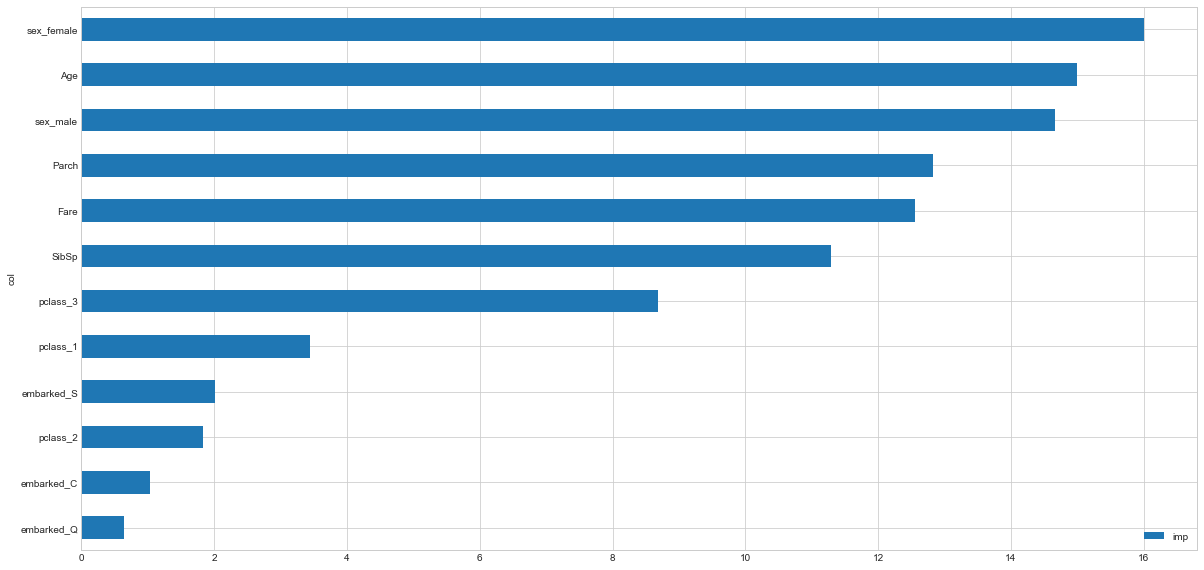

In [78]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

In [79]:

metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8389574843061628
Recall: 0.7088099415204677
F1: 0.7683361072260088
AUC: 0.8955923449333716


In [80]:

# We need our test dataframe to look like this one
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22,1,0,7.2500,0,0,1,0,1,0,0,1
1,38,1,0,71.2833,1,0,0,1,0,1,0,0
2,26,0,0,7.9250,0,0,1,1,0,0,0,1
3,35,1,0,53.1000,0,0,1,1,0,1,0,0
4,35,0,0,8.0500,0,0,1,0,1,0,0,1


In [81]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_test
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22.0


In [82]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [83]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [92]:
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_test,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34.5,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47.0,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62.0,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27.0,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22.0,0,0,1,1,0,0,0,1


In [85]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_female', 'sex_male', 'pclass_1', 'pclass_2',
       'pclass_3'],
      dtype='object')

In [94]:
test = test.rename(columns = {"Age_test": "Age"})


In [96]:
test["Age"] = test["Age"].astype(int)

In [97]:
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22,0,0,1,1,0,0,0,1


In [98]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [99]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [100]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [101]:
# What does our submission have to look like?
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [102]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [103]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../kaggle_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [105]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../kaggle_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
